In [ ]:
# Computer Programming: 2021 SPRING BLOCK2 01 IND 3145 - Block Project
# Name: David Paul Wanjala
# Collaborators: None
# Time: around 40 hours

# Understanding Artificial Neural Networks
#### Presenter: Davidpaul(DP) Wanjala

## What is Intelligence?

Intelligence is the ability to accomplish complex goals.
— (Max Tegmark, 2017)


Artificial Intelligence = Non-biological intelligence.

## How can Intelligence arise from seemingly dumb, physical matter?

* Memory
* Computation
* Learning

## What is Machine Learning?

A computer program is said to learn from experience E with respect to
some task T and some performance measure P, if its performance on T,
as measured by P, improves with experience E.

—Tom Mitchell, 1997

## Ways a machine could learn based on who is providing supervision
* Supervised learning
* Unsupervised learning
* Semisupervised learning
* Reinforcement learning

## Limitations of the traditional approach of programming
* Problems requiring many fine-tuning or long lists of rules
* Problems we don't know how to solve yet and therefore can't program
* Constantly changing environments
* Extracting insights from large volumes of data


# step 1: Import external modules

In [2]:
import os # efficiently create folders
import tensorflow as tf # help us architecture, build, train and evaluate machine learning algorithms
from tensorflow import keras # higher level api to interact with tensorflow
import matplotlib as mpl # visualization of data
import matplotlib.pyplot as plt # visualization of data
import pandas as pd # explore, clean, and process tabular data
import numpy as np # efficiently work with multidimensional arrays

# step 2: Retrieve a dataset of images to use

In [3]:
fashion_mnist_dataset = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist_dataset.load_data()

# step 3: Peak into our dataset

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
X_train_full[0,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [7]:
X_train_full[0,0,0]

0

In [8]:
# visualize a single 28 by 28 pixel image using pandas dataframe

df = pd.DataFrame(X_train_full[0], columns = [column for column in range(28)])
print(df)


    0    1    2    3    4    5    6    7    8    9   ...   18   19   20   21  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    1    4    0   
4    0    0    0    0    0    0    0    0    0    0  ...   54    0    0    0   
5    0    0    0    0    0    0    0    0    0    0  ...  144  123   23    0   
6    0    0    0    0    0    0    0    0    0    0  ...  107  156  161  109   
7    0    0    0    0    0    0    0    0    0    0  ...  216  163  127  121   
8    0    0    0    0    0    0    0    0    0    1  ...  223  223  215  213   
9    0    0    0    0    0    0    0    0    0    0  ...  235  227  224  222   
10   0    0    0    0    0    0    0    0    0    0  ...  180  212  210  211   
11   0    0    0    0    0    0    0    

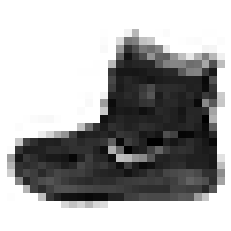

In [9]:
# we can even do better and visualize the same image with matplotlib
plt.imshow(X_train_full[0], cmap="binary")
plt.axis('off')
plt.show()


In [10]:
# | Label | Description |
#   |:-----:|-------------|
#   |   0   | T-shirt/top |
#   |   1   | Trouser     |
#   |   2   | Pullover    |
#   |   3   | Dress       |
#   |   4   | Coat        |
#   |   5   | Sandal      |
#   |   6   | Shirt       |
#   |   7   | Sneaker     |
#   |   8   | Bag         |
#   |   9   | Ankle boot  |

fashion_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"]

In [11]:
# check the associated label for this image
fashion_class_names[y_train_full[0]]

'Ankle boot'

In [12]:
# the label is just a one dimensional array whose indices correspond to an image in the x_train dataset and the
# value of this array can take a number between 0 and 9 corresponding to one of those classes and thus we
# say that our dataset is labeled
y_train_full.shape

(60000,)

In [13]:
# our training set is organised the same way just that it has 10k images, in machine learning the convention
# is to have a larger dataset that you train your model on and a smaller set which the model will not
# have access to while it train and only after it has finished we will test it using test data and see
# how well it performs.
X_test_full.shape

(10000, 28, 28)

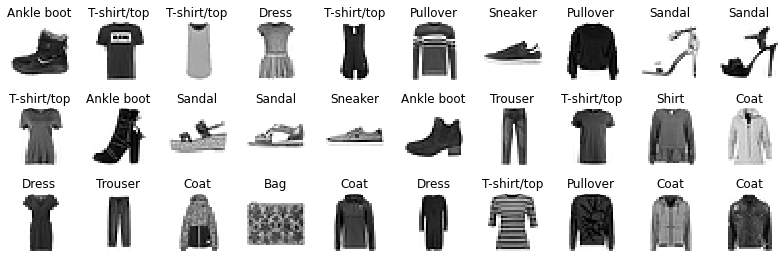

In [14]:
# here i just wanted to show you a sample of the variety of images in the dataset
num_cols = 10
num_rows = 3
plt.figure(figsize=(num_cols * 1.4, num_rows * 1.4))
for row in range(num_rows):
    for col in range(num_cols):
        index = num_cols * row + col
        plt.subplot(num_rows, num_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(fashion_class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

# step 4: Preprocess our dataset
* peak into a single digit representation
* change the intensity representation of our dataset and split further into validation set
* peak into the new digit representation
* plot a single image

In [15]:
# remember the dataset we retrieved from the internet was split into two
# (X_train_full, y_train_full), (X_test_full, y_test_full)
# and each pixel intensity was a number between 0 and 255
# we are going to change that

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_full / 255.0

# visualize a single 28 by 28 pixel image using pandas dataframe

df = pd.DataFrame(X_valid[0], columns = [column for column in range(28)])
print(df)

          0         1         2         3         4         5         6   \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

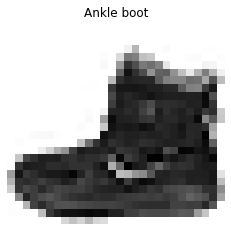

In [16]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.title(fashion_class_names[y_valid[0]], fontsize=12)
plt.show()

# step 5: Visualize the architecture of the neural network we are going to build

Biological neuron
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fdpwanjala%2FSicq6zN28f.png?alt=media&token=485ec334-2df5-41ae-84f3-c553736af937)
(Géron Aurélien,  2019)

Biological neurons are often organized in consecutive layers, especially in cerebral cortex
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fdpwanjala%2FD5YRY01U9o.png?alt=media&token=756325fa-6d8f-42f9-93fe-a8aa384734dd)

A network of neurons can compute function just as a network of NAND gates can
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fdpwanjala%2FrtUju-sw1r.png?alt=media&token=2c1aa9c4-fa58-4cf6-8670-c3c2c5d35f1e)

A perceptron
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fdpwanjala%2FAG1a_mlHEU.png?alt=media&token=6a5fba3b-5038-49ce-a037-02f840a6f79a)
(Géron Aurélien,  2019)

A multilayer perceptron
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fdpwanjala%2FVniPVnSeUY.png?alt=media&token=d1608060-59e2-4709-8f07-176c2843aabc)
(Géron Aurélien,  2019)

# step 6: Specify the neural network architecture and compile the model

In [17]:
# 1. create the model object using the Sequential API class
model = keras.models.Sequential()
# 2. specify the input layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 3. specify a neuron layer
model.add(keras.layers.Dense(300, activation="relu"))
# 4. specify another neuron layer
model.add(keras.layers.Dense(100, activation="relu"))
# 5. specify the output layer
model.add(keras.layers.Dense(10, activation="softmax"))
# 6. compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# step 9: Train our artificial neural network

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7285 - accuracy: 0.7613 - val_loss: 0.5152 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4888 - accuracy: 0.8300 - val_loss: 0.4590 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4419 - accuracy: 0.8447 - val_loss: 0.4162 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4151 - accuracy: 0.8537 - val_loss: 0.3940 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3935 - accuracy: 0.8620 - val_loss: 0.3745 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8669 - val_loss: 0.3793 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3658 - accuracy: 0.8698 - val_loss: 0.3622 - val_accuracy:

# step 10: assess the progress of our network

Is our model learning?
* custom visualization  or learning metrics
* a more  powerful visualization of the metrics with tensorboard


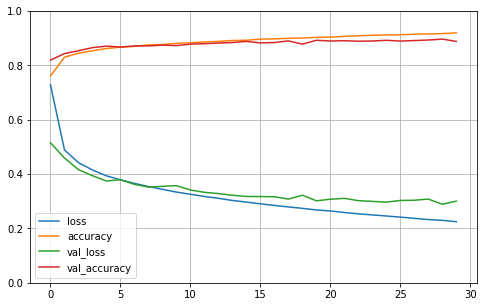

In [21]:
# custom visualization
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# step 11: Evaluate our model
* how well does our model generalize?

In [20]:
# with test data
# remember our data splits
# originally: (X_train_full, y_train_full), (X_test_full, y_test_full)
# then we training data into validation and training but test was still the same
model.evaluate(X_test, y_test_full)


313/313 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.8856

[0.3276130259037018, 0.8855999708175659]

In [21]:
# test it on some data and see how well it predicts
X_new = X_test[:3]
y_probability = model.predict(X_new)
y_probability_round = y_probability.round(2)
y_probability_round
# good place to confirm our predictions

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.02, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

(array([9], dtype=int64),)
(array([2], dtype=int64),)
(array([1], dtype=int64),)


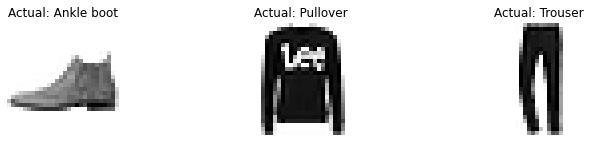

In [23]:
# let us bring out all the three images their correct labes
# and the highest probability predictions from the results above
# it is time for the truth now

counter = 0
fashion_index = 0
plt.figure(figsize=(8 * 2.4, 6 * 2.4))
for item_to_predict in X_new:
    # index_of_highest_probability = y_probability.where(arr == max(y_probability))
    max_probability_label_index = np.where(y_probability_round[fashion_index] == max(y_probability_round[fashion_index]))
    print(max_probability_label_index)
    plt.subplot(4, 5, counter + 1)
    counter += 1
    plt.imshow(item_to_predict, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title("Actual: " + fashion_class_names[y_test_full[fashion_index]], fontsize=12)
    fashion_index += 1
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

In [24]:
fashion_class_names[9]

'Ankle boot'

In [25]:
fashion_class_names[2]

'Pullover'

In [26]:
fashion_class_names[1]

'Trouser'

# step 12: save the world

In [ ]:
model.save("fashion_classifier_model.h5")
